In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/csv/cicids2017_cleaned.csv")

In [3]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'Average Packet Size', 'Subflow Fwd Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_p

/tmp/ipykernel_245645/2412165441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


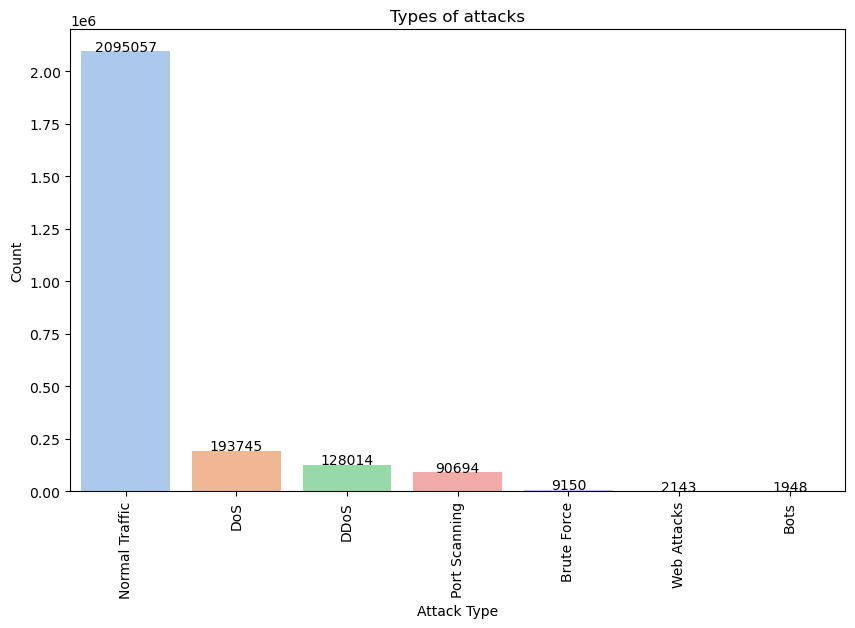

In [4]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = df.loc[df['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()
     


In [ ]:
# separatinf normal traffic and attacks
normal_traffic = df.loc[df['Attack Type'] == 'Normal Traffic']
attacks = df.loc[df['Attack Type'] != 'Normal Traffic']

# undersampling the normal traffic to match the number of attack records
normal_traffic = normal_traffic.sample(n = len(attacks), replace = False)

# combining both attacks and normal traffic
ids_data = pd.concat([attacks, normal_traffic])
# converting the 'Attack Type' column to binary values
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'Normal Traffic'), 0, 1)
# randomly sampling 15000 records from the combined dataset
bc_data = ids_data.sample(n = 15000)

In [11]:
print(bc_data['Attack Type'].value_counts())

Attack Type
0    7539
1    7461
Name: count, dtype: int64


In [8]:
print(len(normal_traffic))
print(len(attacks))

2095057
425694


In [ ]:
# Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix